___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Nome 1 - Augusto Franco de Paula

## Nome 2 - Gabriel Heusi Pereira Bueno de Camargo

## Nome 3 - Pedro Henrique Carvalho Daher

___

___

# INTRODUÇÃO

        A partir de um interesse sobre carros, o grupo optou por fazer um modelo de previsão dos preços de carros e ainda analisar aqueles considerados "Overpriced", ou seja acima do preço considerado padrão para determinado modelo. 
        A base de dados utilizada para o estudo é de 2017 e avalia apenas carros americanos, dessa forma deve-se explorar esta afim de possibilitar tal modelo de predição. Para isso será importante avaliar quais as variáveis de maior influência sobre o preço de um carro para que ao fim haja uma comparação entre o preço real do carro e seu preço esperado a partir das variáveis que o definem. Por fim a análise de carros acima do preço servirá como dado de eficiência do estudo 
        Dessa forma baseou-se em artigos cientificos e estudos que avaliam os modelos de distribuicão destes preços, entre eles estão: 

___
# MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import os
import math
from sklearn.linear_model import Ridge, Lasso
from sys import stdin
from numpy import arange
import numpy as np
import seaborn as sns
from sklearn import preprocessing, cross_validation, neighbors

In [167]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())
data = pd.read_csv('data.csv')


Esperamos trabalhar no diretório
C:\Users\Augusto\Desktop\DP Ciência dos Dados\Projeto3


# BASE DE DADOS

In [168]:
data = shuffle(data)
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4125,Cadillac,Escalade ESV,2017,premium unleaded (recommended),420.0,8.0,AUTOMATIC,four wheel drive,4.0,"Luxury,Performance",Large,4dr SUV,20,15,1624,78995
9281,GMC,Sierra 1500 Classic,2007,regular unleaded,285.0,8.0,AUTOMATIC,rear wheel drive,2.0,Flex Fuel,Large,Regular Cab Pickup,19,15,549,24140
8366,Aston Martin,Rapide S,2014,premium unleaded (required),550.0,12.0,AUTOMATIC,rear wheel drive,4.0,"Exotic,High-Performance",Large,Sedan,19,13,259,198250
3447,Dodge,Dakota,2008,regular unleaded,302.0,8.0,AUTOMATIC,rear wheel drive,4.0,NaN,Compact,Crew Cab Pickup,19,14,1851,28520
11461,Subaru,WRX,2016,premium unleaded (recommended),268.0,4.0,MANUAL,all wheel drive,4.0,Performance,Compact,Sedan,27,20,640,28895


In [169]:
sns.heatmap(data.corr(), annot=True, fmt=".1f")

### A partir do mapa mostrado acima é possível identificar a influência (correlação) de uma variável sobre o preço de um carro. Dessa forma basta analisar e perceber que as três que apresentam maior proporcionalidade são: Ano de fabricação (Year), Potência do Motor (Engine HP) e número de cilindros (Engine Cylinders). Vale lembrar que isto era esperado, afinal essa ferramenta só é capaz de comparar dados quantitativos.

# Análise Descritiva

### A partir desta seção será reavaliada a ideia das variáveis e sua distribuição de acordo com o preço. Como por exemplo a "Engine Cylinders" será categorizado como uma espécie de força fornecida pelos cilindros ao carro e ainda observar onde a predominância do preço dos carros, separando em faixas de valor de compra/venda. 

In [170]:
data = data.loc[data['Engine Cylinders']>0,['Year','Engine HP','Engine Cylinders','MSRP']]
data = data.loc[data['MSRP']<125000,['Year','Engine HP','Engine Cylinders','MSRP']]
data = data.loc[data['Engine HP']>0,['Year','Engine HP','Engine Cylinders','MSRP']]
data.columns=["Ano","Potência","Cilindros","Price"]
data.dropna()

,Ano,Potência,Cilindros,Price
4125,2017,420.0,8.0,78995
9281,2007,285.0,8.0,24140
3447,2008,302.0,8.0,28520
11461,2016,268.0,4.0,28895
11087,2008,240.0,6.0,21540
2055,2017,205.0,4.0,29695
5347,2013,302.0,6.0,37090
1270,2017,278.0,6.0,34375
7933,2015,230.0,4.0,45400
7232,1995,205.0,6.0,2000


In [171]:
faixa = range(5000,80000,3000)
price = pd.cut(data.Price, bins=faixa)
price.value_counts(sort=False, normalize=True)*100

(5000, 8000]       0.291545
(8000, 11000]      0.205161
(11000, 14000]     0.831444
(14000, 17000]     4.459562
(17000, 20000]     6.046863
(20000, 23000]     9.405032
(23000, 26000]    11.186697
(26000, 29000]    10.538819
(29000, 32000]    10.679192
(32000, 35000]     8.638376
(35000, 38000]     7.482993
(38000, 41000]     6.165641
(41000, 44000]     5.344995
(44000, 47000]     4.070835
(47000, 50000]     3.358169
(50000, 53000]     2.569917
(53000, 56000]     1.997624
(56000, 59000]     1.241767
(59000, 62000]     1.382140
(62000, 65000]     1.446928
(65000, 68000]     0.950221
(68000, 71000]     0.701868
(71000, 74000]     0.442717
(74000, 77000]     0.561494
Name: Price, dtype: float64

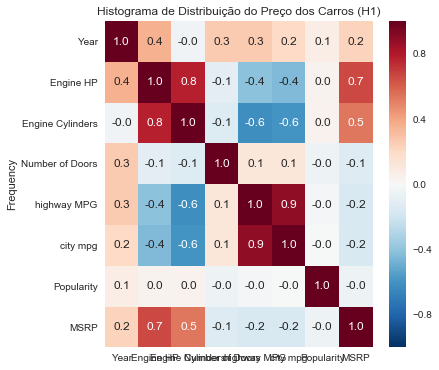

In [172]:
plot = data.Price.plot.hist(bins=faixa,title='Histograma de Distribuição do Preço dos Carros (H1)', figsize=(6, 6), alpha=0.9)
plt.show()

#### Histograma que possibilita a visualização da distribuição dos preços dos carros de acordo com faixas de preço.

___
# MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

o MODELO DE PREDIÇÃO PELA MÉDIA

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

### Sepração da base de dados em treino e teste, considerando que 30% do dataframe ('data') será selecionado aleatoriamente para teste e os outros 70% para treinamento

In [173]:
from sklearn.model_selection import train_test_split as split
train, test = split(data, test_size=0.3)
train.describe()

,Ano,Potência,Cilindros,Price
count,7914.000000,7914.000000,7914.000000,7914.000000
mean,2010.359363,237.876674,5.476371,31628.178418
std,7.660115,91.879343,1.463317,20685.436948
min,1990.000000,55.000000,3.000000,2000.000000
25%,2007.000000,170.000000,4.000000,20678.750000
50%,2015.000000,220.000000,6.000000,29352.500000
75%,2016.000000,292.000000,6.000000,40400.000000
max,2017.000000,707.000000,12.000000,124900.000000


## MODELO DE PREDIÇÃO PELA MÉDIA

### O primeiro modelo de predição realizado foi pela média, que consiste basicamente na análise da média da variável que esperamos prever, no caso o preço dos carros. Para isso basta analisar a média de preços e essa será o valor esperado para o carro

In [174]:
print('O preço esperado de um carro a partir da predição pela média é:',train.Price.mean())

O preço esperado de um carro a partir da predição pela média é: 31628.17841799343


### Coeficiente de determinação (R2) e Raiz do erro médio quadrático (RMS)

In [175]:
n = len(train)
fi = train.Price.mean()
ybarra = train.Price.mean()
yi=train.Price

def R2 (ybarra, fi, yi):
    a = ((yi-fi)**2).sum()
    b = ((yi-ybarra)**2).sum()
    r2=1-(a/b)
    return[r2]

def RSM (ybarra, fi, yi):
    c = ((yi-ybarra)**2).sum()
    raiz = ((1/n)*c)**0.5
    return[raiz]
    
print (R2(ybarra, fi, yi))
print (RSM(ybarra, fi, yi))

[0.0]
[20684.13001801719]


## MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

### A seguir deve ser feito um segundo modelo de predição, no caso o chamado K-Nearest Neighbors Regression, que consiste basicamente em prever o valor do carro baseado em seus vizinhos mais próximos e seus atributos (exceto preço, já que este é usado para o cálculo da média). Isto é, este modelo se fundamenta em descobrir o valor do preço através de uma média dos preços de seus k vizinhos mais próximos. Para determinar quais são os vizinhos mais próximos, um cáclulo é feito e os vizinhos são selecionados.

In [176]:
x = np.array(data.drop(['Price'],1))
y = np.array(data['Price'])

x_train, x_test,y_train, y_test=cross_validation.train_test_split(x,y,test_size=0.5)
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)
accuracy=clf.score(x_test, y_test)
print (accuracy)

0.0988855474969


### Na célula acima foi determinado o alvo à predição: "Price". A base train (25%) e test(75%) foi separada. Além disso uma nova ferramenta foi disposta para verificar a veracidade dos dados: "accuracy". Apesar do "accuracy estar próximo a 10%, o valor ("Price") deste modelo de regressão não ficou muito distante do valor ("Price") real.

In [177]:
ano = input('Digite o ano (2006 até 2017): ')
potencia = input("Digite a potencia (150 até 707): ")
cilindros = input("Digite a quantidade de cilindros (3 até 12): ")

ee=np.array([ano,potencia,cilindros])
ee=ee.reshape(1,-1)
prediction = clf.predict(ee)
print(prediction)

Digite o ano (2006 até 2017): 2015
Digite a potencia (150 até 707): 240
Digite a quantidade de cilindros (3 até 12): 6
[36900]


### Há aqui uma interação entre o usuário e o programa. Sendo que, através da célula acima e do modelo de ressão dos K-vizinhos mais próximos, o usuário é capaz de prever o preço de um carro digitando seu ano, sua potência e sua quantidade de cilindros.

### Coeficiente de determinação (R2) e Raiz do erro médio quadrático (RMS)

In [186]:
n = len(train)
fi = prediction
ybarra = train.Price.mean()
yi=train.Price

def R2 (ybarra, fi, yi):
    a = ((yi-fi)**2).sum()
    b = ((yi-ybarra)**2).sum()
    r2=1-(a/b)
    return[r2]

def RSM (ybarra, fi, yi):
    c = ((yi-ybarra)**2).sum()
    raiz = ((1/n)*c)**0.5
    return[raiz]
    
print (R2(ybarra, fi, yi))
print (RSM(ybarra, fi, yi))

[1.0005769882534974]
[20684.13001801719]


## MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

## O próximo modelo preditivo a ser realizado para análise dos preços de carro é pelo método de regressão linear, este se baseia.... 

In [179]:
atributos = [ "Potência","Cilindros", "Ano"]
objetivo = ['Price']

In [180]:
def ridge_regression(train, atributos, alpha):
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(train[atributos],train['Price'])
    y_pred = ridgereg.predict(train[atributos])
    return(y_pred)

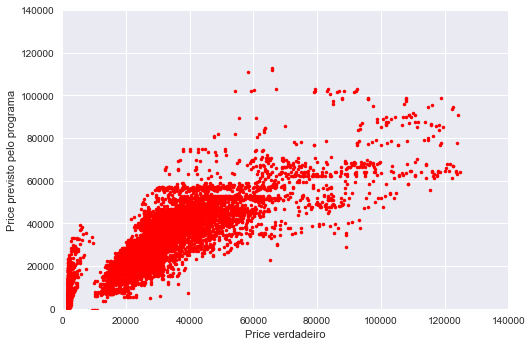

In [181]:
ridge = ridge_regression(train, atributos,1e-5)
plt.plot(train['Price'],ridge,'.', color="red")
plt.axis([0, 140000, 0, 140000])
plt.xlabel("Price verdadeiro")
plt.ylabel("Price previsto pelo programa")
plt.show()

### Coeficiente de determinação (R2) e Raiz do erro médio quadrático (RMS)

In [182]:
n = len(train)
fi = ridge
ybarra = train.Price.mean()
yi=train.Price

def R2 (ybarra, fi, yi):
    a = ((yi-fi)**2).sum()
    b = ((yi-ybarra)**2).sum()
    r2=1-(a/b)
    return[r2]

def RSM (ybarra, fi, yi):
    c = ((yi-ybarra)**2).sum()
    raiz = ((1/n)*c)**0.5
    return[raiz]
    
print (R2(ybarra, fi, yi))
print (RSM(ybarra, fi, yi))

[0.7237531727619644]
[20684.13001801719]


## MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

### O último modelo de predição necessário é conhecido por Decision Tree Regression, ou seja Árvores de Regressão. Nesse caso as árvores de decisão são usadas para ajustar uma curva senoidal com observação adicional de variáveis...

In [183]:
from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(X, Y)
model.score(X, Y)
ano = input('Digite o ano (2006 até 2017): ')
potencia = input("Digite a potencia (150 até 707): ")
cilindros = input("Digite a quantidade de cilindros (3 até 12): ")
ee=np.array([ano,potencia,cilindros,(train.Price.mean())])
ee=ee.reshape(1,-1)
predicted = model.predict(ee)
print(predicted)

NameError: name 'X' is not defined

### 